In [ ]:
Decision Tree

In [1]:
# Import necessary libraries

import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier


In [2]:
# Read file sql in Python

# pip install pandas     # in cmd
# pip install pyodbc     # in cmd

import pandas as pd
import pyodbc as odbc

ConnectionString=odbc.connect(
    'Driver={SQL Server Native Client 11.0};'        # see in SSIS
    'Server=DESKTOP-FP3EF1L\SQLEXPRESS;'             # see in SQL Server management studio
    'Database=DAP305;'
    'Trusted_Connection=yes;')

Query=pd.read_sql_query('Select * from FACT',ConnectionString)
df=pd.DataFrame(Query)
df.head()


C:\Users\PC\AppData\Local\Temp\ipykernel_9032\3914674229.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Query=pd.read_sql_query('Select * from FACT',ConnectionString)


,ID,exch_usd,GDP_Weighted_Default,Inflation_Annual_CPI,SystemCrisisID,DomesticDebtID,ExternalDebtID,IndependenceID,CurrencyCrisesID,InflationCrisesID,BankingCrisisID
0,1,0.052264,0.0,3.441456,1,0,0,0,0,0,1
1,2,0.052798,0.0,14.149140,0,0,0,0,0,0,0
2,3,0.052274,0.0,-3.718593,0,0,0,0,0,0,0
3,4,0.051680,0.0,11.203897,0,0,0,0,0,0,0
4,5,0.051308,0.0,-3.848561,0,0,0,0,0,0,0


In [3]:
# Defining x, y for data set

x = np.asanyarray(df.drop(['ID','SystemCrisisID'],axis=1))
y = np.asanyarray(df['SystemCrisisID'])
D=df.drop(['ID','SystemCrisisID'],axis=1).columns
print('Các nhân tố có thể ảnh hưởng tới Systemic Crisis: ',D)

Các nhân tố có thể ảnh hưởng tới Systemic Crisis:  Index(['exch_usd', 'GDP_Weighted_Default', 'Inflation_Annual_CPI',
       'DomesticDebtID', 'ExternalDebtID', 'IndependenceID',
       'CurrencyCrisesID', 'InflationCrisesID', 'BankingCrisisID'],
      dtype='object')


In [4]:
# Normalizing data set

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)      
#x[0:5]

In [5]:
# Trainset & Testset

from sklearn.model_selection import train_test_split

x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

print('x_trainset shape: ', x_trainset.shape)
print('y_trainset shape: ', y_trainset.shape)
print('x_testset shape: ', x_testset.shape)
print('y_testset shape: ', y_testset.shape)


x_trainset shape:  (741, 9)
y_trainset shape:  (741,)
x_testset shape:  (318, 9)
y_testset shape:  (318,)


In [6]:
# Decision tree model

Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)    
Tree 


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [7]:
Tree.fit(x_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [8]:
# Prediction

predTree = Tree.predict(x_testset)

In [9]:
# Comparing y_predict & y_test

print ('predTree: ',predTree [0:5])
print ('y_testset: ',y_testset [0:5])


predTree:  [0 0 0 0 0]
y_testset:  [0 0 0 0 0]


In [10]:
# Evaluating model

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))


DecisionTrees's Accuracy:  0.9716981132075472


In [22]:
# Evaluating model

from sklearn.metrics import jaccard_score
jaccard_score(y_testset, predTree)
print('jaccard_score: ',jaccard_score)


jaccard_score:  <function jaccard_score at 0x00000267C321CB80>


In [12]:
# Tạo Ma trận nhầm lẫn (confusion matrix)

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 15   3]
 [  6 294]]


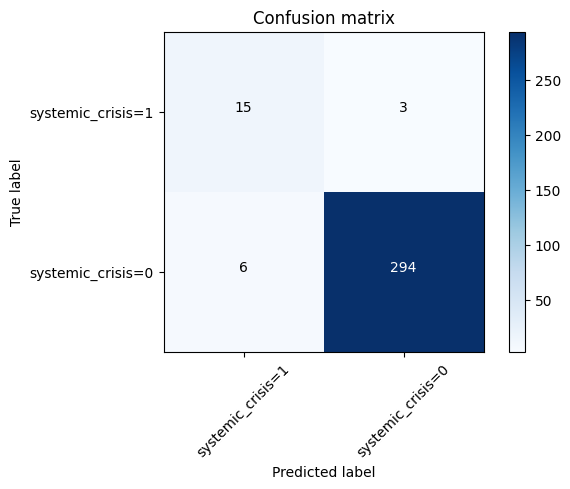

In [13]:
# Run confusion matrix for the model
cnf_matrix = confusion_matrix(y_testset, predTree, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['systemic_crisis=1','systemic_crisis=0'],normalize= False,  title='Confusion matrix')


In [14]:
print (classification_report(y_testset, predTree))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       300
           1       0.71      0.83      0.77        18

    accuracy                           0.97       318
   macro avg       0.85      0.91      0.88       318
weighted avg       0.97      0.97      0.97       318



In [15]:
predTree_prob = Tree.predict_proba(x_testset)
predTree_prob[0:5]

array([[1.  , 0.  ],
       [0.91, 0.09],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [16]:
# log loss: a good metric for comparing models, a lower log loss value means better predictions

from sklearn.metrics import log_loss
log_loss(y_testset, predTree_prob)

0.15845351100391716

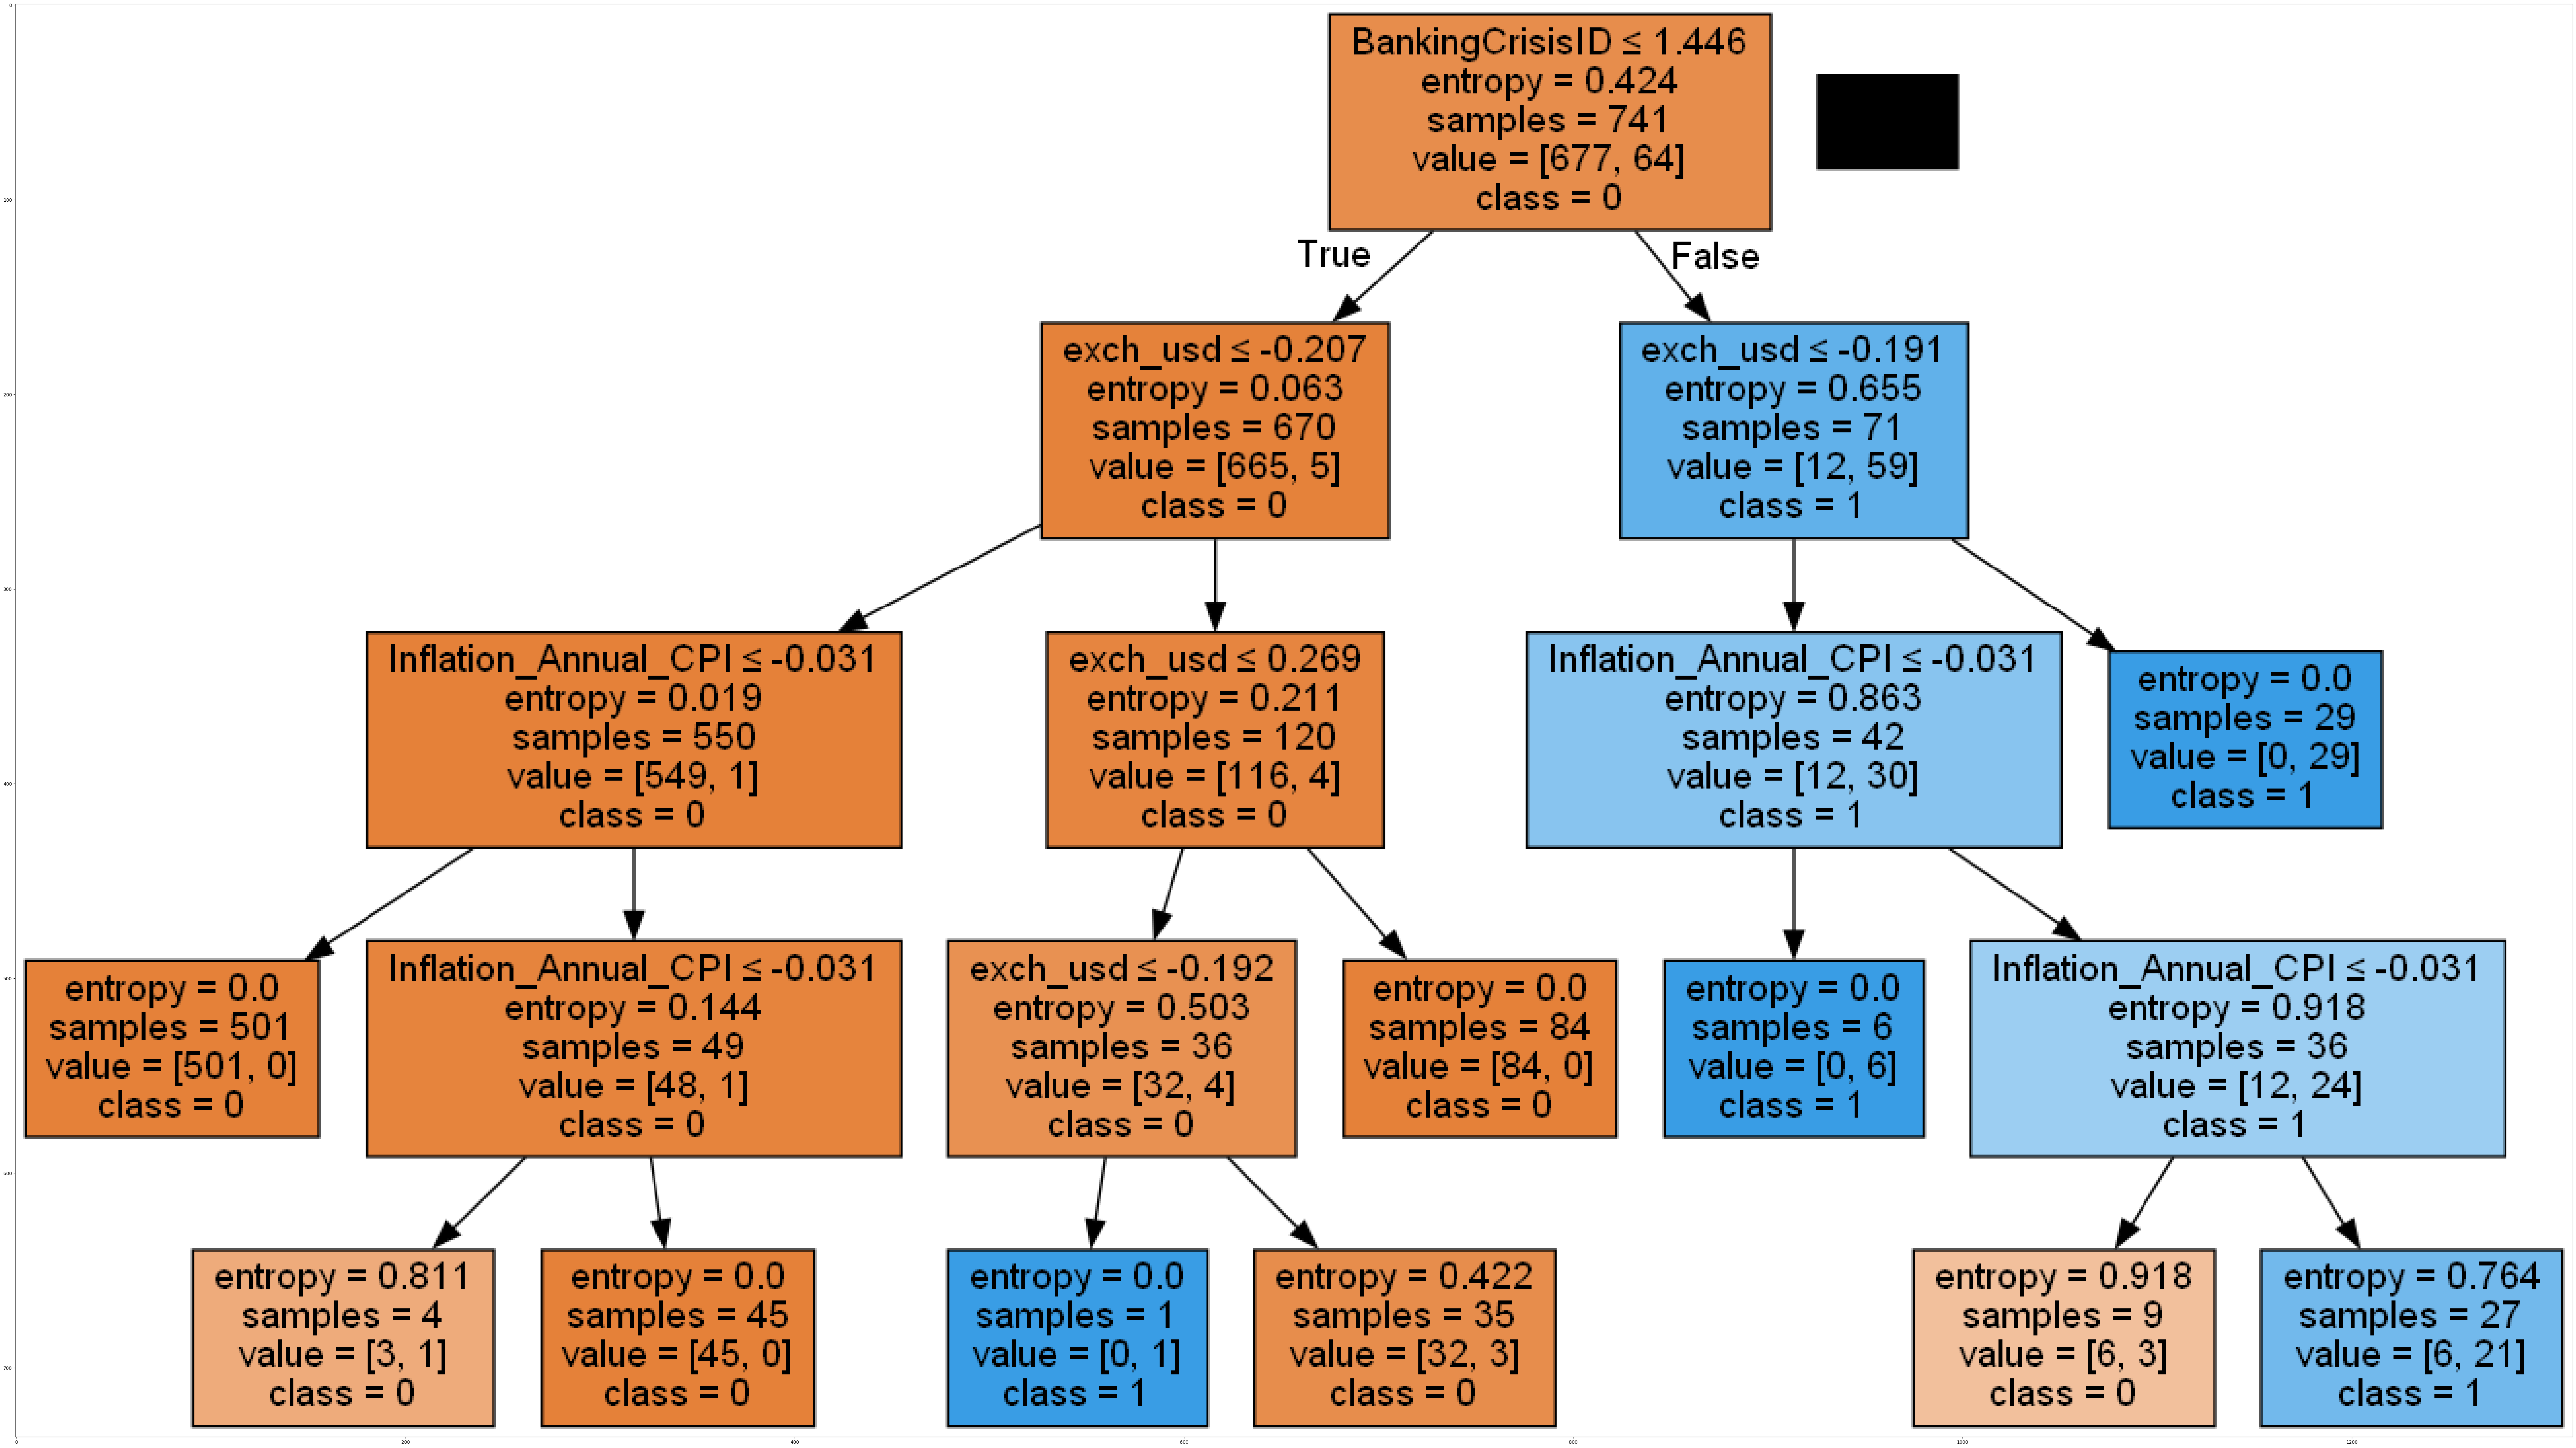

In [18]:
# Visualizing the model

from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

dot_data = StringIO()
filename = "drugtree.png"
featureNames = 'exch_usd', 'GDP_Weighted_Default', 'Inflation_Annual_CPI', 'DomesticDebtID', 'ExternalDebtID', 'IndependenceID', 'CurrencyCrisesID', 'InflationCrisesID', 'BankingCrisisID'
out=tree.export_graphviz(Tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset.astype('str')), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# out: cần đưa y_trainset về dạng int

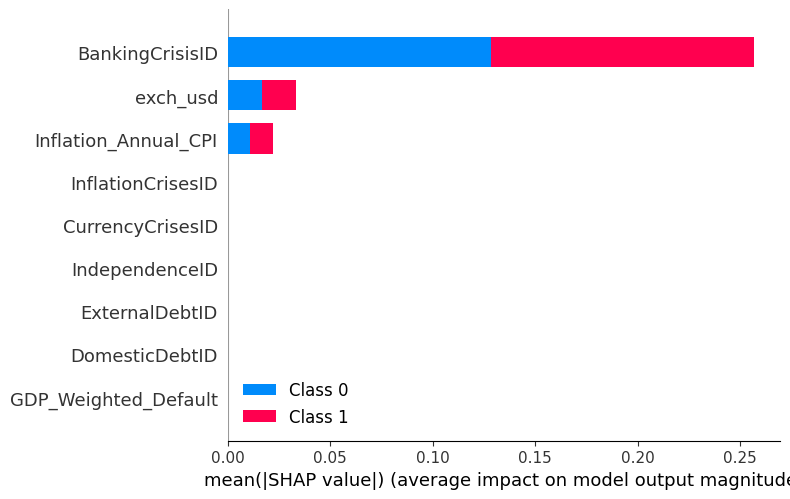

In [20]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(Tree)
shap_values = explainer.shap_values(x_testset)

shap.summary_plot(shap_values, x_testset, plot_type='bar', feature_names=D)
